# 🚢 Titanic Survival Prediction

This notebook predicts passenger survival using machine learning on the Titanic dataset.  
We’ll perform:

- 📊 Exploratory Data Analysis (EDA)  
- 🛠️ Feature Engineering  
- 📈 Model Training & Evaluation (Logistic Regression, Decision Tree)  

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

## 📥 Load and Inspect Data

We start by importing necessary libraries and reading the Titanic dataset.


In [3]:
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 📊 Exploratory Data Analysis (EDA)

We'll explore the dataset to understand the distribution of features and their relationship with survival.

## Data Visualization
### Countplot : Overall Survival

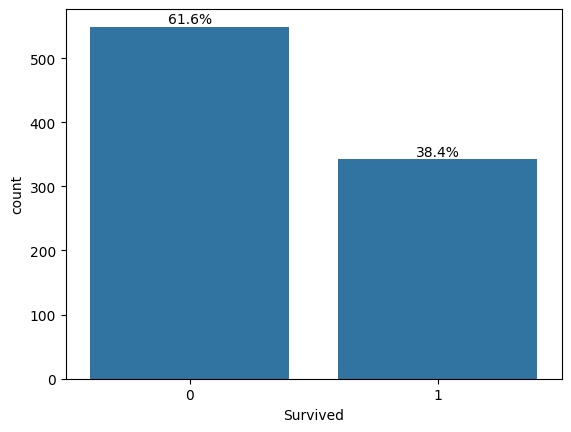

In [7]:
total = len(df)
ax = sns.countplot(x='Survived', data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 5,
            f'{(height/total)*100:.1f}%', ha="center")


### Countplot: Survival by Gender

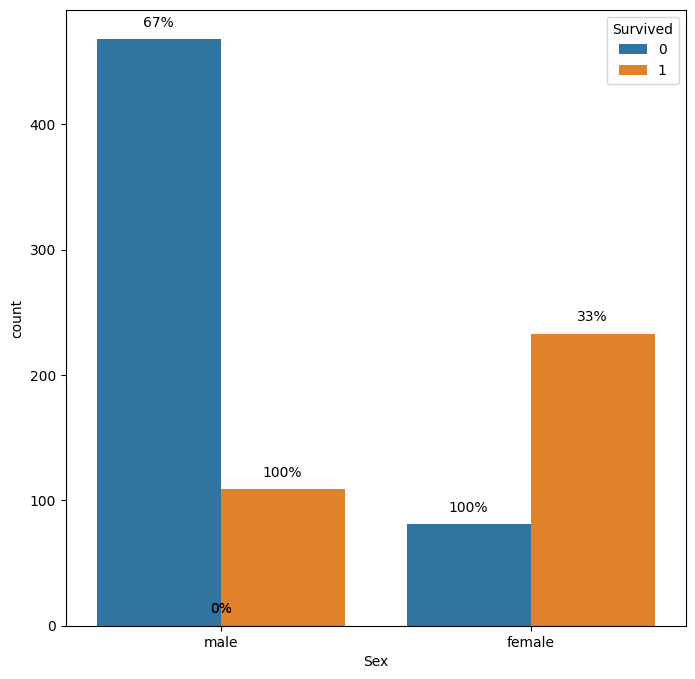

In [8]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='Sex',data=df,hue="Survived")
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 10, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 10, '{0:.0%}'.format(height_r/total), ha="center")


###  Countplot: Survival by Passenger Class

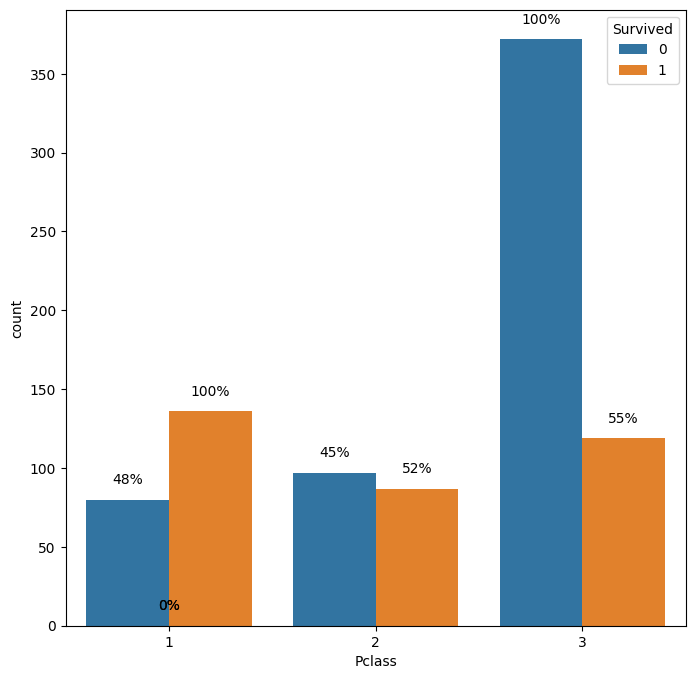

In [9]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='Pclass',data=df,hue="Survived")
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 10, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 10, '{0:.0%}'.format(height_r/total), ha="center")

### Heatmap of Correlation

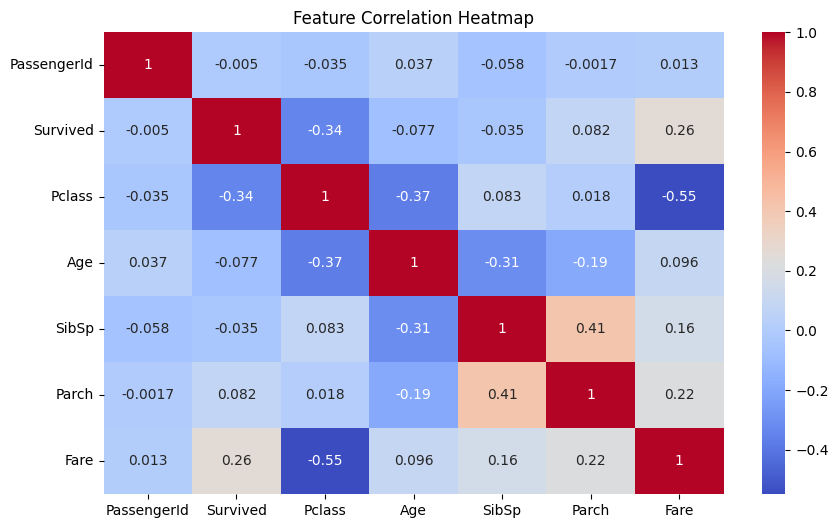

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

## 🧼 Data Cleaning and Preprocessing

We'll handle missing values, drop irrelevant columns, and fix inconsistent data types.

### Correcting Datatype for Variable in data

In [11]:
df['Pclass'].value_counts(ascending=False) # Categorial Data

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [12]:
print("Pclass:",df.Pclass.dtype)

Pclass: int64


In [13]:
#Survived
df['Survived'].value_counts(ascending=False) 

Survived
0    549
1    342
Name: count, dtype: int64

In [14]:
print("Survived':",df.Survived.dtype)

Survived': int64


## Decoding Values
### Convert Categories to Human-Readable Labels

In [15]:
df['Pclass'] = df['Pclass'].replace({ 1 : '1st', 2: '2nd',3: '3rd'}).astype('category')
df['Pclass'].value_counts(ascending=False)

Pclass
3rd    491
1st    216
2nd    184
Name: count, dtype: int64

In [16]:
df['Embarked'] = df['Embarked'].replace({ 'C' : 'Cherbourg', 'Q': 'Queenstown','S': 'Southampton'}).astype('object')
df['Embarked'].value_counts(ascending=False)

Embarked
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3rd,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,1,1st,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,3rd,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,1,1st,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,0,3rd,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton


### Check and Handle missing values

In [18]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
#Age
df['Age'].isnull().sum()

np.int64(177)

In [20]:
df['Age'] = df['Age'].replace(np.nan,df.Age.median())
df['Age'].isnull().sum()

np.int64(0)

In [21]:
#Fare
df.Fare.isnull().sum()

np.int64(0)

In [22]:
df['Fare'] = df['Fare'].replace(np.nan,df.Fare.median())
df['Fare'].isnull().sum()

np.int64(0)

In [23]:
#Cabin
df.Cabin.isnull().sum()

np.int64(687)

###  Drop Columns with Too Many Missing Values

In [24]:
df=df.drop(['Cabin'],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3rd,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Southampton
1,2,1,1st,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Cherbourg
2,3,1,3rd,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Southampton
3,4,1,1st,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Southampton
4,5,0,3rd,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Southampton


## 🏗️ Feature Engineering

We create new features like `Family` size and perform feature scaling.

In [25]:
df['Family']= df['SibSp']+ df['Parch']+ 1 #including the passenger him/herself
df=df.drop(['SibSp','Parch'],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family
0,1,0,3rd,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,Southampton,2
1,2,1,1st,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,Cherbourg,2
2,3,1,3rd,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,Southampton,1
3,4,1,1st,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,Southampton,2
4,5,0,3rd,"Allen, Mr. William Henry",male,35.0,373450,8.0500,Southampton,1


In [26]:
#Name & Ticket Number are not an important feature for prediction
df=df.drop(['Name','Ticket'],axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,1,0,3rd,male,22.0,7.2500,Southampton,2
1,2,1,1st,female,38.0,71.2833,Cherbourg,2
2,3,1,3rd,female,26.0,7.9250,Southampton,1
3,4,1,1st,female,35.0,53.1000,Southampton,2
4,5,0,3rd,male,35.0,8.0500,Southampton,1


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Fare','Family']]= scaler.fit_transform(df[['Age', 'Fare','Family']])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,1,0,3rd,male,-0.565736,-0.502445,Southampton,0.059160
1,2,1,1st,female,0.663861,0.786845,Cherbourg,0.059160
2,3,1,3rd,female,-0.258337,-0.488854,Southampton,-0.560975
3,4,1,1st,female,0.433312,0.420730,Southampton,0.059160
4,5,0,3rd,male,0.433312,-0.486337,Southampton,-0.560975


###  Convert Categorical Variables to Dummies

In [28]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['Pclass', 'Sex','Embarked']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Pclass_2nd,Pclass_3rd,Sex_male,Embarked_Queenstown,Embarked_Southampton
0,1,0,3rd,male,-0.565736,-0.502445,Southampton,0.059160,False,True,True,False,True
1,2,1,1st,female,0.663861,0.786845,Cherbourg,0.059160,False,False,False,False,False
2,3,1,3rd,female,-0.258337,-0.488854,Southampton,-0.560975,False,True,False,False,True
3,4,1,1st,female,0.433312,0.420730,Southampton,0.059160,False,False,False,False,True
4,5,0,3rd,male,0.433312,-0.486337,Southampton,-0.560975,False,True,True,False,True


In [29]:
#Drop existing columns
df=df.drop(['Pclass', 'Sex','Embarked'],axis=1)
df.head()

,PassengerId,Survived,Age,Fare,Family,Pclass_2nd,Pclass_3rd,Sex_male,Embarked_Queenstown,Embarked_Southampton
0,1,0,-0.565736,-0.502445,0.059160,False,True,True,False,True
1,2,1,0.663861,0.786845,0.059160,False,False,False,False,False
2,3,1,-0.258337,-0.488854,-0.560975,False,True,False,False,True
3,4,1,0.433312,0.420730,0.059160,False,False,False,False,True
4,5,0,0.433312,-0.486337,-0.560975,False,True,True,False,True


## 🤖 Model 1: Logistic Regression

We train a Logistic Regression model and evaluate its performance.

In [30]:
X= df.drop(columns=['Survived'],axis=1)
Y= df['Survived']

In [31]:
X.head()

,PassengerId,Age,Fare,Family,Pclass_2nd,Pclass_3rd,Sex_male,Embarked_Queenstown,Embarked_Southampton
0,1,-0.565736,-0.502445,0.059160,False,True,True,False,True
1,2,0.663861,0.786845,0.059160,False,False,False,False,False
2,3,-0.258337,-0.488854,-0.560975,False,True,False,False,True
3,4,0.433312,0.420730,0.059160,False,False,False,False,True
4,5,0.433312,-0.486337,-0.560975,False,True,True,False,True


In [32]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [34]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [35]:
#Predict on the test set
y_pred_lr = logreg.predict(X_test)

In [36]:
#Evaluate the model
accuracy= accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr, average='weighted')
recall= recall_score(y_test, y_pred_lr, average='weighted')
f1 = f1_score(y_test, y_pred_lr, average='weighted')

#Print out the evaluation metrices
print(f'Accuracy: {accuracy*100:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 79.33
Precision: 0.79
Recall: 0.79
F1 Score: 0.79


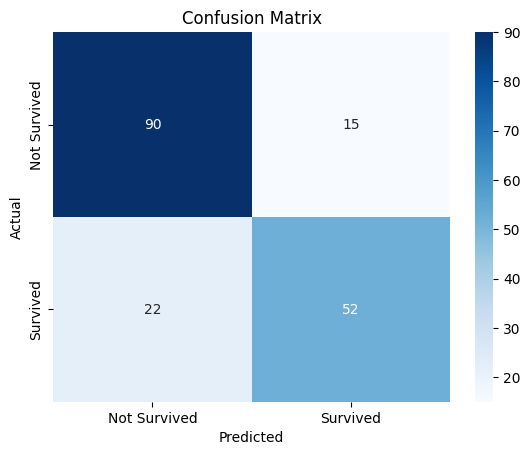


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.78      0.70      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [37]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))


## 🌲 Model 2: Decision Tree Classifier

We train a Decision Tree on the dataset and compare its performance.

In [38]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [39]:
# predict the target on the train dataset
y_pred_dt = dtree.predict(X_test)

In [40]:
accuracy= accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt, average='weighted')
recall= recall_score(y_test, y_pred_dt, average='weighted')
f1 = f1_score(y_test, y_pred_dt, average='weighted')


print('Accuracy_score : ', accuracy*100)
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy_score :  73.74301675977654
Precision: 0.74
Recall: 0.74
F1 Score: 0.74


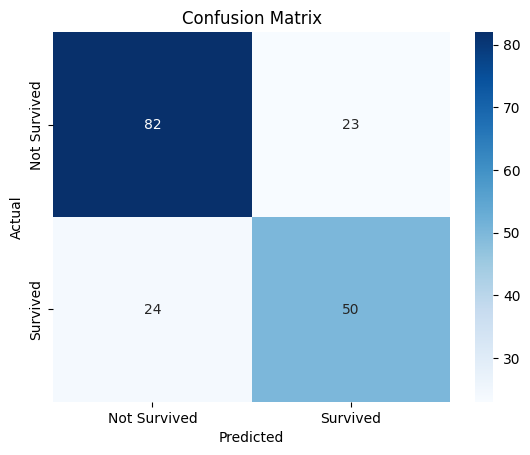


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       105
           1       0.68      0.68      0.68        74

    accuracy                           0.74       179
   macro avg       0.73      0.73      0.73       179
weighted avg       0.74      0.74      0.74       179



In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test,y_pred_dt))

#### 🎯 Conclusion

- The Logistic Regression model gave an accuracy of **79.33%**.
- The Decision Tree model gave an accuracy of **73.74%**.
- Passenger class, gender, and embarkation location were strong indicators of survival.
- Further improvement can be done using hyperparameter tuning, cross-validation, or ensemble models like Random Forest or Gradient Boosting.